In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
train_path = "TRAIN.csv"
test_path = "TEST.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26149 entries, 0 to 26148
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idx                     26149 non-null  int64  
 1   UNIXTime                26149 non-null  int64  
 2   Data                    26149 non-null  object 
 3   Time                    26149 non-null  object 
 4   Radiation               26149 non-null  float64
 5   Temperature             26149 non-null  int64  
 6   Pressure                26149 non-null  float64
 7   Humidity                26149 non-null  int64  
 8   WindDirection(Degrees)  26149 non-null  float64
 9   Speed                   26149 non-null  float64
 10  TimeSunRise             26149 non-null  object 
 11  TimeSunSet              26149 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 2.4+ MB


In [4]:
train_df.head()

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1480107904,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00
1,1,1472818508,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00
2,2,1475804719,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00
3,3,1482533149,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00
4,4,1481883019,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00


In [5]:
train_df.describe()

,idx,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,26149.000000,2.614900e+04,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000
mean,13074.000000,1.478046e+09,208.621000,51.135110,30.423005,74.970936,143.368247,6.262052
std,7548.710431,3.004309e+06,316.089736,6.212018,0.054679,26.008728,83.424186,3.503488
min,0.000000,1.472724e+09,1.110000,35.000000,30.190000,8.000000,0.090000,0.000000
25%,6537.000000,1.475544e+09,1.230000,46.000000,30.400000,56.000000,81.580000,3.370000
50%,13074.000000,1.478029e+09,2.720000,50.000000,30.430000,85.000000,147.320000,5.620000
75%,19611.000000,1.480473e+09,360.260000,55.000000,30.460000,97.000000,179.240000,7.870000
max,26148.000000,1.483264e+09,1601.260000,71.000000,30.560000,103.000000,359.940000,40.500000


In [6]:
train_df.isnull().sum()

idx                       0
UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [7]:
train_df.shape

(26149, 12)

In [8]:
train_df.columns

Index(['idx', 'UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature',
       'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
       'TimeSunRise', 'TimeSunSet'],
      dtype='object')

In [9]:
train_df = train_df.rename({"Data":"Date"},axis = 1)
test_df = test_df.rename({"Data":"Date"},axis = 1)

In [10]:
train_df['Date'] = pd.to_datetime(train_df["Date"].apply(str))
train_df['Time'] = pd.to_datetime(train_df["Time"].apply(str))

In [11]:
train_df["hour"] = train_df["Time"].dt.strftime("%H")
train_df["minutes"] = train_df["Time"].dt.strftime("%M")

In [12]:
train_df['TimeSunRise'] = pd.to_datetime(train_df['TimeSunRise'])
train_df['TimeSunSet'] = pd.to_datetime(train_df['TimeSunSet'])

In [13]:
train_df["length_of_the_day"] = (train_df['TimeSunSet']-train_df['TimeSunRise']).dt.total_seconds()

In [14]:
train_df.drop(["idx","Date","Time","TimeSunRise","TimeSunSet"],axis = 1 ,inplace =True)

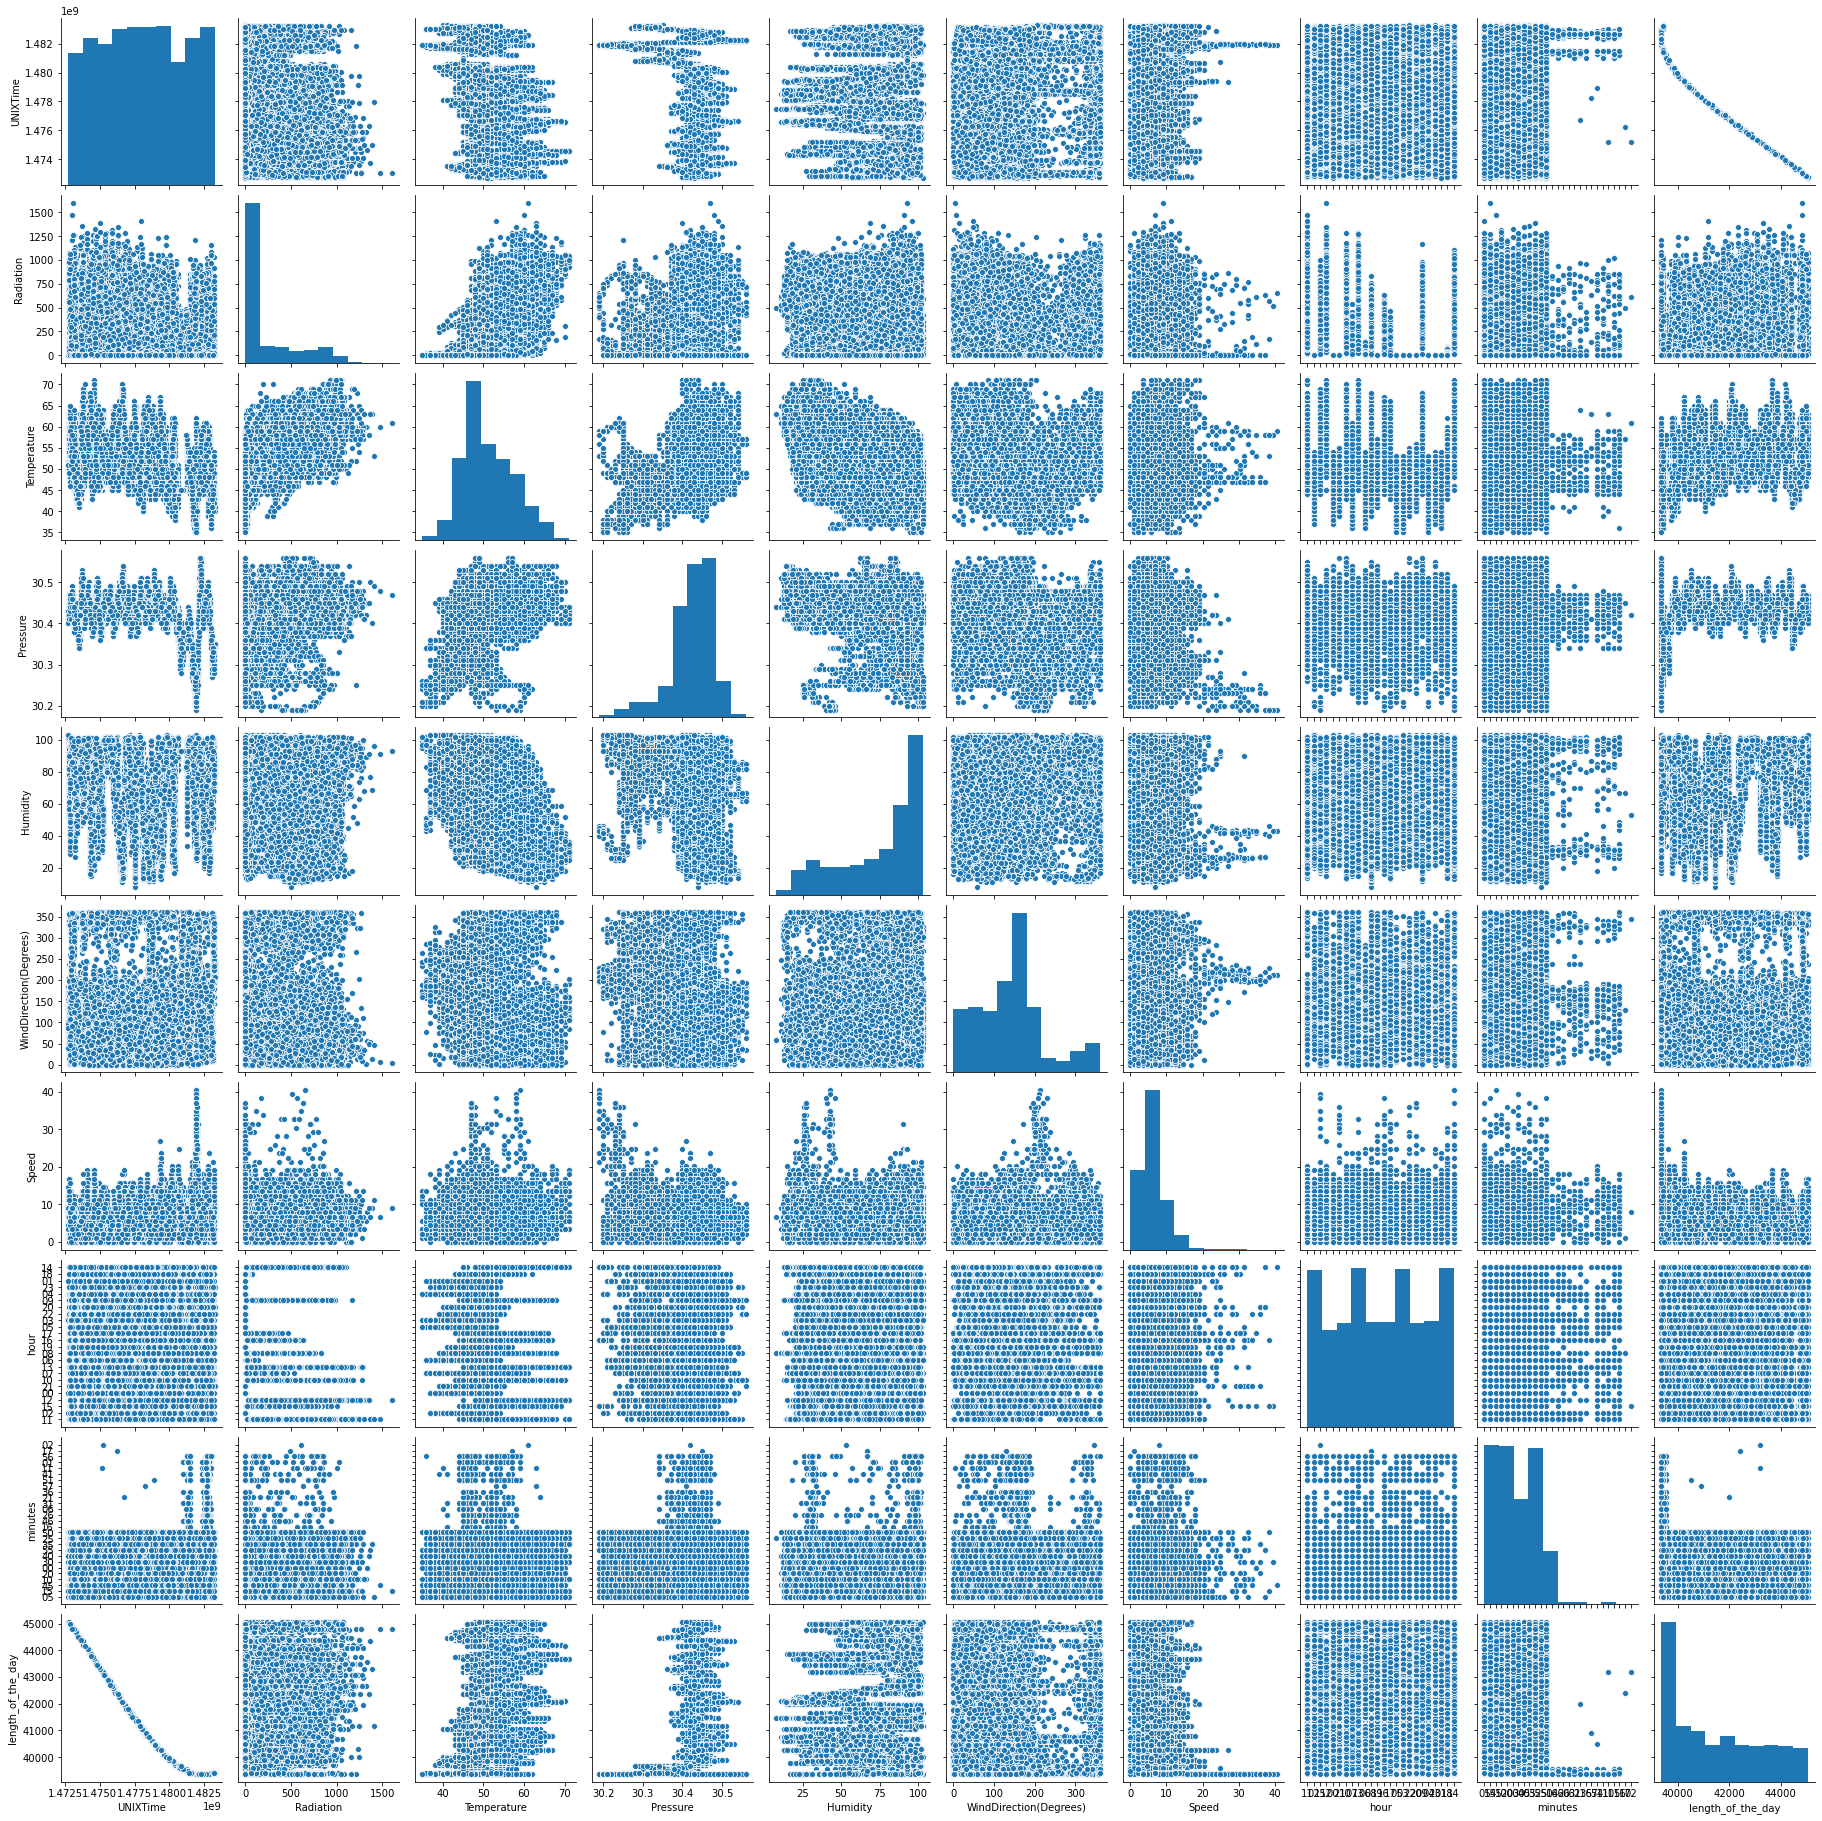

In [15]:
sns.pairplot(train_df)

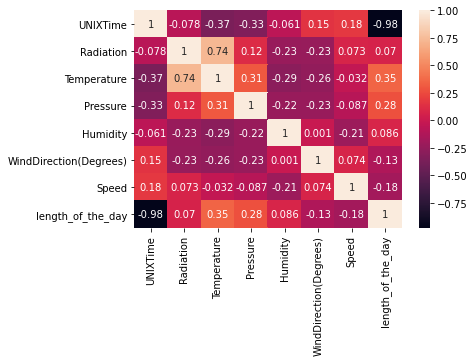

In [16]:
sns.heatmap(train_df.corr(),annot=True)

In [17]:
y = train_df.iloc[:,1:2]

In [18]:
x = train_df.drop(["Radiation"],axis=1)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.24)

In [20]:
x_test.shape,x_train.shape,test_df.shape

((6276, 9), (19873, 9), (6537, 11))

In [21]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

<ipython-input-21-5538211bde8b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor()

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions

array([  1.2148,  23.2844,   1.1977, ...,   1.2337,   1.2381, 139.5649])

In [32]:
mean_squared_error(y_test,predictions,squared=False)

82.03032026364856

In [25]:
model1 = SVR()
model1.fit(x_train,y_train)

C:\Users\Susmisatya\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [28]:
predictions1 = model1.predict(x_test)

In [29]:
predictions1

array([2.66281713, 2.68396394, 2.67105173, ..., 2.66919319, 2.67993176,
       2.68841692])

In [33]:
mean_squared_error(y_test,predictions1,squared=False)

380.81358323376634

In [62]:
# only for submission

In [34]:
test_df.head()

,idx,UNIXTime,Date,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1482775250,12/26/2016 12:00:00 AM,08:00:50,48,30.47,101,187.78,4.50,06:55:00,17:51:00
1,1,1482774940,12/26/2016 12:00:00 AM,07:55:40,48,30.47,101,133.40,10.12,06:55:00,17:51:00
2,2,1482774649,12/26/2016 12:00:00 AM,07:50:49,48,30.47,101,160.69,5.62,06:55:00,17:51:00
3,3,1482774351,12/26/2016 12:00:00 AM,07:45:51,48,30.47,101,144.56,7.87,06:55:00,17:51:00
4,4,1482774039,12/26/2016 12:00:00 AM,07:40:39,48,30.47,101,169.05,10.12,06:55:00,17:51:00


In [35]:
test_df['Date'] = pd.to_datetime(test_df["Date"].apply(str))
test_df['Time'] = pd.to_datetime(test_df["Time"].apply(str))

In [36]:
test_df["hour"] = test_df["Time"].dt.strftime("%H")
test_df["minutes"] = test_df["Time"].dt.strftime("%M")

In [37]:
test_df['TimeSunRise'] = pd.to_datetime(test_df['TimeSunRise'])
test_df['TimeSunSet'] = pd.to_datetime(test_df['TimeSunSet'])

In [38]:
test_df["length_of_the_day"] = (test_df['TimeSunSet']-test_df['TimeSunRise']).dt.total_seconds()

In [39]:
test_df.drop(["idx","Date","Time","TimeSunRise","TimeSunSet"],axis = 1 ,inplace =True)

In [45]:
test_predictions = model.predict(test_df)

In [40]:
test_predictions1 = model1.predict(test_df)

In [46]:
test_predictions

array([140.504 ,  75.9608,  73.913 , ...,   1.2   ,   1.1986,   1.2007])

In [41]:
test_predictions1

array([2.65123571, 2.65123704, 2.65123829, ..., 2.66065007, 2.66065135,
       2.66065264])